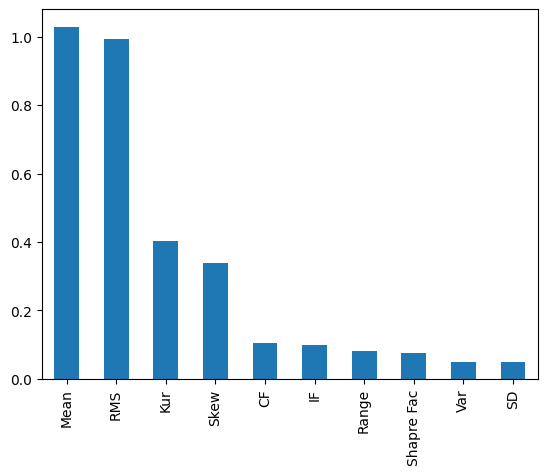

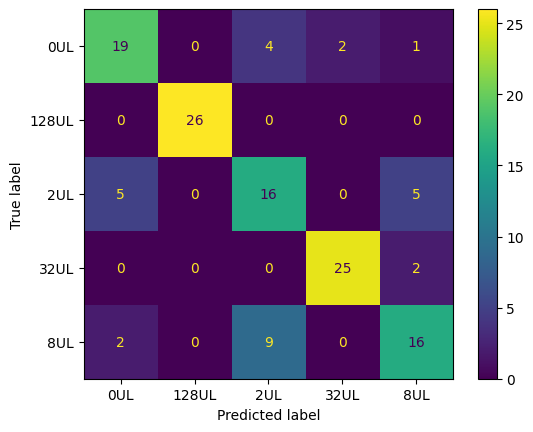

              precision    recall  f1-score   support

         0UL       0.73      0.73      0.73        26
       128UL       1.00      1.00      1.00        26
         2UL       0.55      0.62      0.58        26
        32UL       0.93      0.93      0.93        27
         8UL       0.67      0.59      0.63        27

    accuracy                           0.77       132
   macro avg       0.78      0.77      0.77       132
weighted avg       0.78      0.77      0.77       132



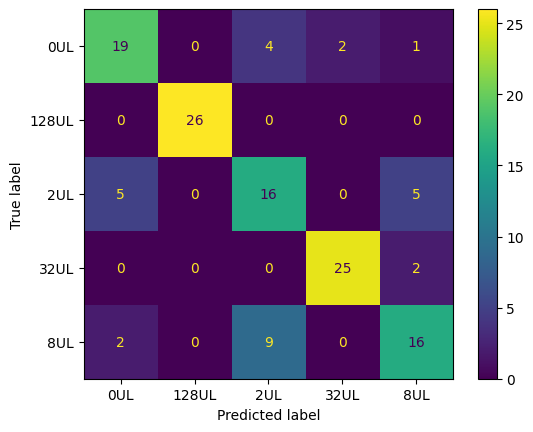

              precision    recall  f1-score   support

         0UL       0.77      0.77      0.77        26
       128UL       0.96      1.00      0.98        26
         2UL       0.73      0.73      0.73        26
        32UL       0.93      0.96      0.95        27
         8UL       0.84      0.78      0.81        27

    accuracy                           0.85       132
   macro avg       0.85      0.85      0.85       132
weighted avg       0.85      0.85      0.85       132



UsageError: Line magic function `%%time` not found.


In [ ]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

data = pd.read_csv('Stat_Feature_Extracted.csv')
data.head()

X = data.drop('TARGET', axis =1)
y = data['TARGET']

X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

mi = mutual_info_classif(X_train,y_train)
len(mi)

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace=True)
mi.plot.bar()

sel = SelectPercentile(mutual_info_classif, percentile=60).fit(X_train, y_train)
X_train.columns[sel.get_support()]
len(X_train.columns[sel.get_support()])

X_train_mi = sel.transform(X_train)
X_test_mi = sel.transform(X_test)
X_train_mi.shape




# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_mi, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_mi)

# Making the Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifiern = GaussianNB()
classifiern.fit(X_train_mi, y_train)

# Predicting the Test set results
y_pred = classifiern.predict(X_test_mi)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)


cm2 = confusion_matrix(y_test, y_pred, labels=classifiern.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifiern.classes_)
disp.plot()
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set:')
    print(accuracy_score(y_test, y_pred))


%%time
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

#  cm1 = confusion_matrix(y_test, y_pred)





